In [4]:
using DiffEqBase, OrdinaryDiffEq,
      Sundials, Plots, ODEInterface, ODEInterfaceDiffEq,
      LSODA, ModelingToolkit, DiffEqDevTools
using PyCall
include("potentials/inversepower.jl")
include("minimumassign/minimumassign.jl")
include("utils/utils.jl")

SystemError: SystemError: opening file "/home/praharsh/research/bv-libraries/basins.jl/notebooks/potentials/inversepower.jl": No such file or directory

In [2]:
natoms = 1024
radii_arr = generate_radii(0, natoms, 1.,1.4, 0.05, 0.05*1.4)
dim = 2.0
phi = 0.9
power = 2.5
eps = 1

length_arr = get_box_length(radii_arr, phi, dim)

potential = InversePowerPeriodic(2, power, eps, [length_arr, length_arr],  radii_arr)

coords = generate_random_coordinates(length_arr, natoms, dim)

tol = 1e-4

odefunc = gradient_problem_function_all!(potential)
tspan = (0, 100.)

UndefVarError: UndefVarError: generate_radii not defined

In [30]:
prob = ODEProblem{true}(odefunc, coords, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 2048-element Vector{Float64}:
 52.39046838081611
 36.74480591981076
 55.42685294153423
 33.882799816918016
 33.12989305160377
  1.819396523230826
 21.779979309210177
 38.124508112676615
 54.64986826730645
  7.966219125871074
 55.3654808019938
 12.853127278181178
 34.22247606633572
  ⋮
 42.54075147613884
 30.901603346484116
 54.259109920092776
 39.714957003584004
  4.934584040797528
 47.74033812189726
 21.80021085939665
 31.813201361186117
  1.1691992666840005
  5.924613379927544
 47.25091219759947
 14.378658321411296

In [45]:
@time sol = solve(prob, CVODE_BDF(), abstol=1/10^12, reltol=1/10^12)
sol.destats

256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256
2
256


In [5]:
BLAS.set_num_threads(1);
abstols = 1.0 ./ 10.0 .^ (5:8);
reltols = 1.0 ./ 10.0 .^ (5:8);
setups = [
          Dict(:alg=>Rosenbrock23(autodiff=false)),
          Dict(:alg=>TRBDF2(autodiff=false)),
          Dict(:alg=>QNDF(autodiff=false)),
          #Dict(:alg=>rodas()),
          Dict(:alg=>CVODE_BDF()),
          #Dict(:alg=>Rodas4(autodiff=false)),
          #Dict(:alg=>Rodas5(autodiff=false)),
          Dict(:alg=>KenCarp4(autodiff=false)),
          Dict(:alg=>KenCarp47(autodiff=false)),
          #Dict(:alg=>RadauIIA5(autodiff=false)),
          #Dict(:alg=>lsoda()),
          ];

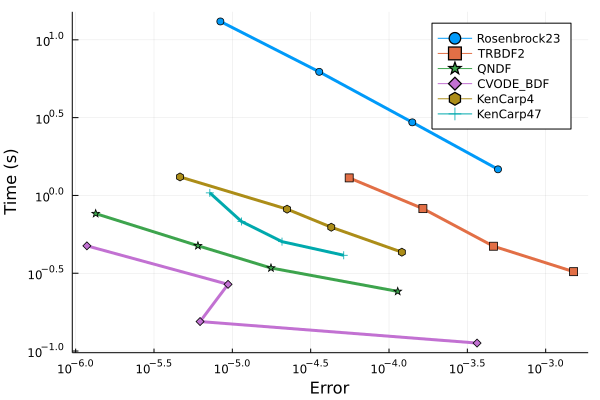

In [6]:
wp2 = WorkPrecisionSet(prob,abstols,reltols,setups;error_estimate=:l2,
                      appxsol=sol,maxiters=Int(1e5),numruns=1);
plot(wp2)

In [14]:
reltol = 1/10^5
abstol = reltol

1.0e-5

In [11]:
odefunc = gradient_problem_function_all!(potential);
tspan = (0, 100.);

In [12]:
prob = ODEProblem(odefunc, coords, tspan);

In [17]:
@time sol = solve(prob, CVODE_BDF(), abstol=abstol, reltol=reltol);

  0.121482 seconds (1.07 M allocations: 91.020 MiB, 4.62% compilation time)


retcode: Success
Interpolation: 3rd order Hermite
t: 118-element Vector{Float64}:
   0.0
   0.010070503526980286
   0.02014100705396057
   0.041611539993145846
   0.06308207293233112
   0.08455260587151639
   0.12348610001601937
   0.2134207226908711
   0.30335534536572284
   0.3932899680405746
   0.48322459071542634
   0.5731592133902781
   0.6630938360651298
   ⋮
  67.69546731234264
  70.8278433021203
  73.96021929189796
  77.09259528167561
  80.22497127145327
  83.35734726123093
  86.48972325100858
  89.62209924078624
  92.7544752305639
  95.88685122034155
  99.01922721011921
 100.0
u: 118-element Vector{Vector{Float64}}:
 [5.26547250894492, 7.938874364818388, 8.8488166077642, 7.019171417218076, 4.290953061383954, 0.5702411025692091, 3.228738571851173, 7.018362820827343, 0.3944484188752373, 2.4502458959085827  …  4.431363975462053, 8.22158712979583, 8.701529612544768, 7.324813082841852, 1.1367116491304365, 1.0447858894419346, 0.7273850491669233, 7.101313208494044, 0.9584178814432026

In [18]:
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  146
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    16
Number of linear solves:                           0
Number of Jacobians created:                       3
Number of nonlinear solver iterations:             143
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          115
Number of rejected steps:                          2

In [19]:
@time sol = solve(prob, QNDF(autodiff=false), abstol=abstol, reltol=reltol);

  0.569166 seconds (2.93 M allocations: 257.805 MiB, 12.25% gc time, 57.87% compilation time)


retcode: Success
Interpolation: 3rd order Hermite
t: 98-element Vector{Float64}:
   0.0
   1.5521839177574223e-6
   3.1043678355148446e-6
   4.656551753272267e-6
   2.017839093084649e-5
   3.5700230108420715e-5
   5.122206928599494e-5
   6.674390846356916e-5
   0.0002219623002393114
   0.0003771806920150536
   0.0005323990837907958
   0.000687617475566538
   0.0022398013933239602
   ⋮
  65.97881374007433
  69.15173205064744
  72.32465036122055
  75.49756867179366
  78.67689762831682
  81.85622658483999
  85.03555554136315
  88.21488449788632
  91.39421345440948
  94.68234962351634
  97.97048579262321
 100.0
u: 98-element Vector{Vector{Float64}}:
 [5.26547250894492, 7.938874364818388, 8.8488166077642, 7.019171417218076, 4.290953061383954, 0.5702411025692091, 3.228738571851173, 7.018362820827343, 0.3944484188752373, 2.4502458959085827  …  4.431363975462053, 8.22158712979583, 8.701529612544768, 7.324813082841852, 1.1367116491304365, 1.0447858894419346, 0.7273850491669233, 7.10131320849404

In [20]:
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  477
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    20
Number of linear solves:                           278
Number of Jacobians created:                       3
Number of nonlinear solver iterations:             258
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          97
Number of rejected steps:                          1

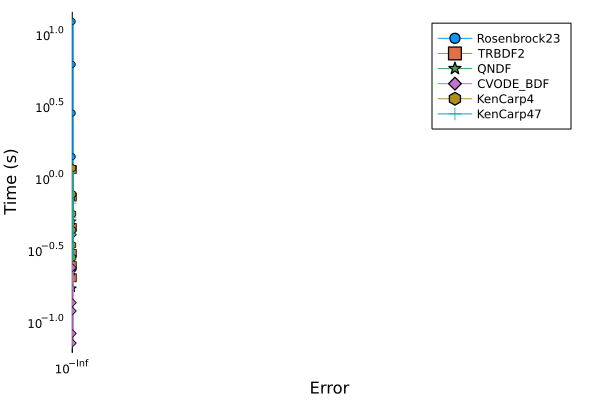

┌ Warning: No strict ticks found
└ @ PlotUtils /home/praharsh/.julia/packages/PlotUtils/es5pb/src/ticks.jl:283
┌ Warning: No strict ticks found
└ @ PlotUtils /home/praharsh/.julia/packages/PlotUtils/es5pb/src/ticks.jl:283


In [28]:
plot(wp2, fmt=:png)

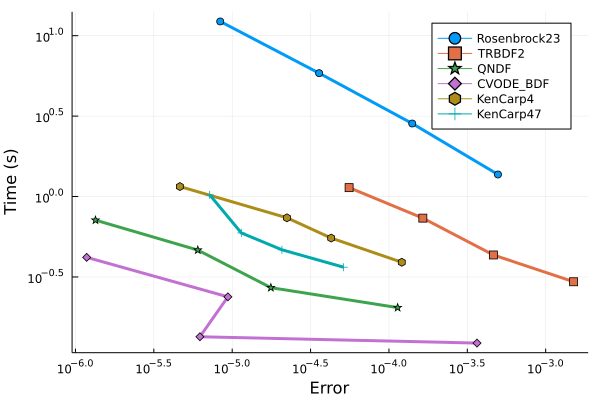

In [9]:
BLAS.set_num_threads(4);
abstols = 1.0 ./ 10.0 .^ (5:8);
reltols = 1.0 ./ 10.0 .^ (5:8);
setups = [
          Dict(:alg=>Rosenbrock23(autodiff=false)),
          Dict(:alg=>TRBDF2(autodiff=false)),
          Dict(:alg=>QNDF(autodiff=false)),
          #Dict(:alg=>rodas()),
          Dict(:alg=>CVODE_BDF()),
          #Dict(:alg=>Rodas4(autodiff=false)),
          #Dict(:alg=>Rodas5(autodiff=false)),
          Dict(:alg=>KenCarp4(autodiff=false)),
          Dict(:alg=>KenCarp47(autodiff=false)),
          #Dict(:alg=>RadauIIA5(autodiff=false)),
          #Dict(:alg=>lsoda()),
          ];
wp2 = WorkPrecisionSet(prob,abstols,reltols,setups;error_estimate=:l2,
                      appxsol=sol,maxiters=Int(1e5),numruns=1);
plot(wp2)

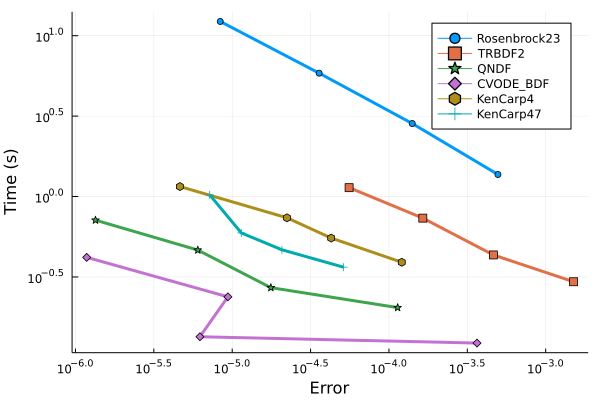

In [10]:
plot(wp2, fmt=:png)

In [15]:
@time sol = solve(prob, Rodas5(autodiff=false), abstol=abstol, reltol=reltol);

  5.812777 seconds (16.53 M allocations: 1.200 GiB, 4.02% gc time, 0.07% compilation time)


In [16]:
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  1763
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    40
Number of linear solves:                           320
Number of Jacobians created:                       40
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          39
Number of rejected steps:                          1

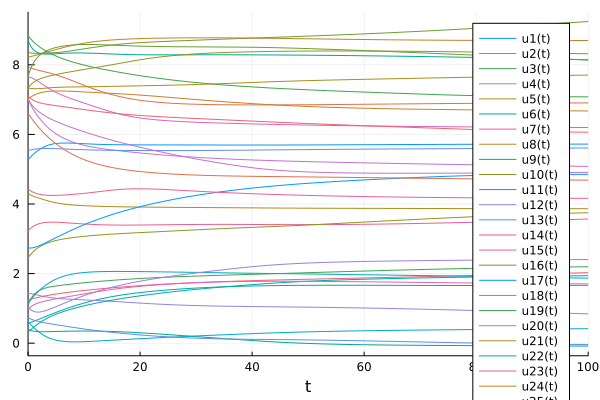

In [17]:
plot(sol)

Sparse Code tests

In [31]:
include("potentials/pele-interface.jl")

pele_wrapped_pot = pot.InversePower(2.5, 1.0, radii_arr, ndim=2, boxvec = [length_arr, length_arr])
pele_wrapped_pot.getEnergy(coords)

90.8752551273449

In [32]:
pele_wrapped_python_pot = PythonPotential(pele_wrapped_pot)
odefunc_pele = gradient_problem_function_pele(pele_wrapped_python_pot)

(::ODEFunction{true, var"#func!#61"{PythonPotential}, UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}) (generic function with 7 methods)

In [33]:
prob = ODEProblem{true}(odefunc_pele, coords, tspan);

In [34]:
BLAS.set_num_threads(1);
abstols = 1.0 ./ 10.0 .^ (5:8);
reltols = 1.0 ./ 10.0 .^ (5:8);
setups = [
          Dict(:alg=>Rosenbrock23(autodiff=false)),
          Dict(:alg=>TRBDF2(autodiff=false)),
          Dict(:alg=>QNDF(autodiff=false)),
          #Dict(:alg=>rodas()),
          Dict(:alg=>CVODE_BDF()),
          #Dict(:alg=>Rodas4(autodiff=false)),
          #Dict(:alg=>Rodas5(autodiff=false)),
          Dict(:alg=>KenCarp4(autodiff=false)),
          Dict(:alg=>KenCarp47(autodiff=false)),
          #Dict(:alg=>RadauIIA5(autodiff=false)),
          #Dict(:alg=>lsoda()),
          ];

In [35]:
@time sol = solve(prob, QNDF(autodiff=false), abstol=1/10^12, reltol=1/10^12);
sol.destats

927.757960 seconds (9.45 M allocations: 1.891 GiB, 0.04% gc time)


DiffEqBase.DEStats
Number of function 1 evaluations:                  28427
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    1677
Number of linear solves:                           17288
Number of Jacobians created:                       2
Number of nonlinear solver iterations:             17284
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          7038
Number of rejected steps:                          896

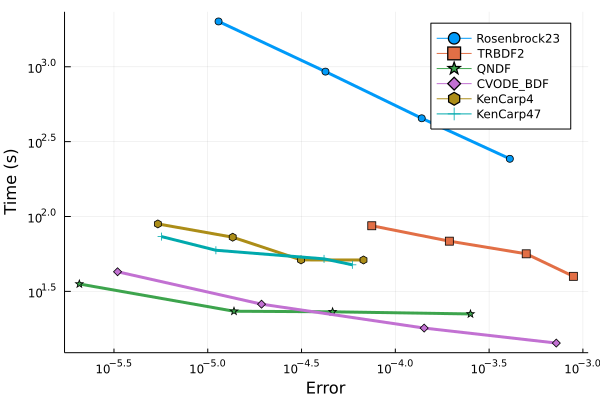

In [36]:
wp2 = WorkPrecisionSet(prob,abstols,reltols,setups;error_estimate=:l2,
                      appxsol=sol,maxiters=Int(1e5),numruns=1);
plot(wp2)

In [39]:
abstol = 1/10^5
reltol = abstol
@time sol = solve(prob, QNDF(autodiff=false), abstol=abstol, reltol=reltol);
@show sol.destats

 23.200341 seconds (394.27 k allocations: 355.346 MiB, 0.10% gc time)
sol.destats = DiffEqBase.DEStats
Number of function 1 evaluations:                  8557
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    19
Number of linear solves:                           276
Number of Jacobians created:                       4
Number of nonlinear solver iterations:             251
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          82
Number of rejected steps:                          0


DiffEqBase.DEStats
Number of function 1 evaluations:                  8557
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    19
Number of linear solves:                           276
Number of Jacobians created:                       4
Number of nonlinear solver iterations:             251
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          82
Number of rejected steps:                          0

In [43]:
abstol = reltol
time_sol = solve(prob, CVODE_BDF(), abstol=abstol, reltol=reltol);

In [49]:
time_sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  141
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    17
Number of linear solves:                           0
Number of Jacobians created:                       4
Number of nonlinear solver iterations:             138
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          105
Number of rejected steps:                          1

In [47]:
figure = plot(wp2, fmt=:png)
savefig("1024.png")

In [48]:
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  8557
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    19
Number of linear solves:                           276
Number of Jacobians created:                       4
Number of nonlinear solver iterations:             251
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          82
Number of rejected steps:                          0

In [1]:
Pkg.status("DiffEqBase")

UndefVarError: UndefVarError: `Pkg` not defined